In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from scipy import stats

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
cars = sm.datasets.get_rdataset('mtcars').data
print(cars.head(4).T)
print(cars.info())

      Mazda RX4  Mazda RX4 Wag  Datsun 710  Hornet 4 Drive
mpg       21.00         21.000       22.80          21.400
cyl        6.00          6.000        4.00           6.000
disp     160.00        160.000      108.00         258.000
hp       110.00        110.000       93.00         110.000
drat       3.90          3.900        3.85           3.080
wt         2.62          2.875        2.32           3.215
qsec      16.46         17.020       18.61          19.440
vs         0.00          0.000        1.00           1.000
am         1.00          1.000        1.00           0.000
gear       4.00          4.000        4.00           3.000
carb       4.00          4.000        1.00           1.000
<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non

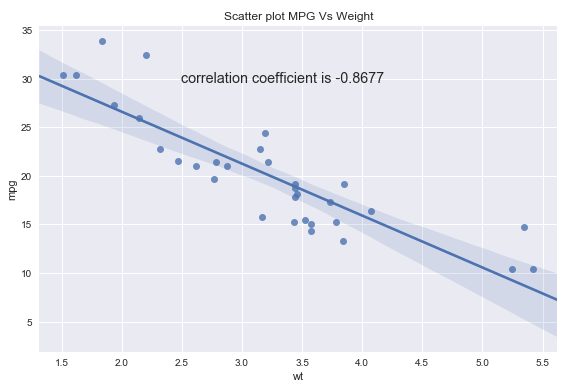

In [9]:
sns.regplot(x=cars.wt, y=cars.mpg, ci = 95)

corcoef = np.corrcoef(cars.mpg, cars.wt)[0,1]

text_cc = '\n\n\n\ncorrelation coefficient is %1.4f'%corcoef
plt.title('Scatter plot MPG Vs Weight')
plt.suptitle(text_cc)
plt.gcf().tight_layout()
# plt.text(15,6.5,text_cc)

plt.show()

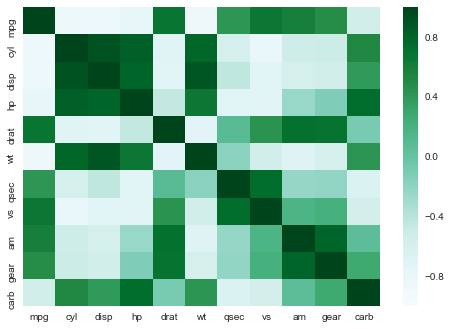

In [6]:
sns.heatmap(cars.corr(), cmap='BuGn')
plt.show()

In [7]:
print('\nCorrelation coefficient between mpg and wt is %1.2f' %np.corrcoef(cars.mpg, cars.wt)[0,1])


Correlation coefficient between mpg and wt is -0.87


In [10]:
import statsmodels.api as sm
X  =  cars.wt
y  =  cars.mpg

X = sm.add_constant(X) # Add an intercept to our model

model         = sm.OLS(y, X).fit() ## OLS(output, input)
predictions   = model.predict(X)

## Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Tue, 14 May 2019   Prob (F-statistic):           1.29e-10
Time:                        11:36:19   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""